# 공장을 만들꺼다 모델 공장

### 아이디어는 다음과 같습니다.

# 순서
### 1.전처리 : base 파일은 아무칼럼도 제거하지 않은 파일 -> 우리는 이 파일에서 몇개씩 칼럼을 제거하며 모델의 성능을 파악할 것임
        사용법 : 
        prepro() 함수를 사용하세요
        prepro("파일경로", ["삭제할 칼럼", "삭제할 칼럼2"]) --> 삭제할 칼럼 여러개를 집어넣어도 된다. 단 존재해야함
        prepro("파일경로") --> 삭제할 칼럼을 적지 않으면 삭제하지 않고 원핫인코딩한 pd를 리턴해준다
        df = prepro("파일경로") --> 이런식으로 df에 저장가능함

### 2.데이터 나누기 : 
        사용법 : 
        get() 함수를 사용하세요
        get("파일경로") --> 판다스 파일을 보내주면 알아서 train데이터 test데이터 validation데이터 나눠준다. 
                        비율은 train test가 8대2로 나눠
        X_trn, y_trn, X_tst, y_tst = get('파일경로')  --> 이런식으로 리턴이 총4개 항목이기에 변수 4개에 넣어준다.

### 3.모델 여러개 만들기
        사용법 : 
                앞에 설명 존재

# 커스텀모델 함수를 사용해보자

### 인공신경망 만드는 함수
- factiory_model( 트레이닝 데이터(X값=칼럼=피쳐=열) ,  타겟 데이터(맞춰야하는 데이터) , 하이퍼 파라미터 셋팅한 json파일의 이름)
- -> EX :  factory_model(X_trn, y_trn,'config.json')

          리턴값(아웃풋)은 인공신경망 모델을 리턴함 학습도 가능함
          model = factory_model(X_trn, y_trn,'config.json')
          model.fit(X_trn, y_trn)
### 인공신경망 모델 여러개 만드는 함수
- create_models( 트레이닝 데이터(X값=칼럼=피쳐=열) ,  타겟 데이터(맞춰야하는 데이터), 하이퍼 파라미터 셋팅한 json파일의 이름 'configW.json' 무조건 W가 뒤에 붙어있어야함 , 몇개의 config.json파일을 넣을 것인지 )
- -> EX :  create_models(X_trn, y_trn,'configW.json',2)

          리턴값(아웃풋)은 인공신경망 모델 여러개를 담은 리스트를 리턴함 인덱스로 꺼내서 사용 가능함
          models = create_models(X_trn, y_trn,'configW.json',2)
          model1 = models[0]
### 인공신경만 모델에 대한 교차검증 함수
- CV(모델(한개의 모델), 트레이닝 데이터(X값=칼럼=피쳐=열) ,  타겟 데이터(맞춰야하는 데이터), 5번 교차 검증을 할 것이고 기본값이기에 안적어도 됨)
- -> EX :  CV(m, feature, label, n_splits=5)

          리턴값(아웃풋)은 판다스 데이터프레임이다 교차검증 후 5번 평균의 결과값을 가지고 있음 다음과 같이 프레임 확인도 가능함
          d = CV(m, feature, label, n_splits=5)  
          d.head()
### 인공신경만 모델 여러개에 대한 교차검증 함수
- models_cv(모델들(여러개의 모델), 트레이닝 데이터(X값=칼럼=피쳐=열) ,  타겟 데이터(맞춰야하는 데이터), 5번 교차 검증을 할 것이고 기본값이기에 안적어도 됨)
- -> EX :  models_cv(models, feature, label, n_splits=5)

          리턴값(아웃풋)은 판다스 데이터프레임이다 여러 모델들을 순서대로 하나씩 5번 교차검증 후 데이터 평균 결과값을 한 행마다 스택처럼 쌓아서 리턴함
          d = models_cv(models, feature, label, n_splits=5) 
          d.head()


### 4.모델 여러개 cross validation 교차검증 하기 



### 5.최종 모델 선정

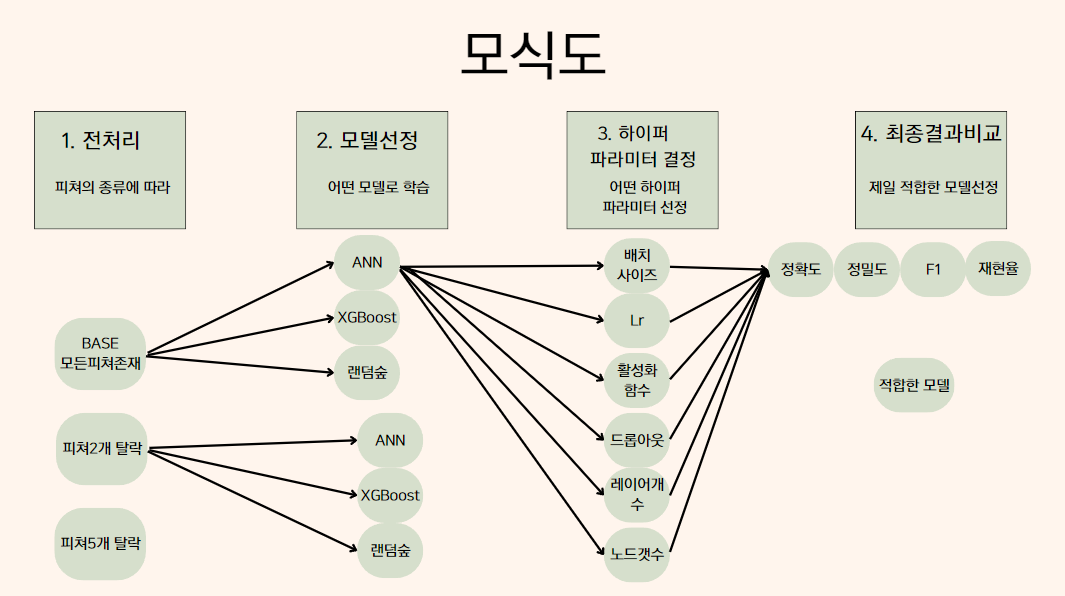

#### 정서익 : 전처리, 모델선정, 파이프라인 구성
#### 임지혜 : 전처리, 모델선정, 파이프라인 구성

---

#### 황소연 : 깃 관리, 프로젝트 진행관리, 하이퍼파라미터 및 결과 비교
#### 강현준 : 모델 학습, 하이퍼 파라미터 결정, 성능비교
#### 이채욱 : 모델 학습, 하이퍼 파라미터 결정, 성능비교
#### 임준수 : He is Gone..

In [1]:
import torch
import pandas as pd
from get import get,prepro
from factory_model import factory_model, create_models , models_cv
from cv import CV
from sklearn.metrics import accuracy_score
print(torch.__version__)

2.1.1


In [ ]:
df = prepro("data/base.csv",['사망자수','중상자수','경상자수','부상신고자수','사고내용'])
df.info()

In [ ]:
# df.to_csv("data/prepro_so_5.csv")

In [ ]:
#df.to_csv("data/f5.csv")

In [2]:
X_trn, y_trn, X_tst, y_tst = get('data/f5.csv')

In [ ]:
#model = factory_model(X_trn,y_trn,"config.json")
#model.fit(X_trn,y_trn)

In [ ]:
#predictions = model.predict(X_tst)
#accuracy = accuracy_score(y_tst, predictions)
#print(accuracy)

In [ ]:
#df = CV(model,X_trn,y_trn,n_splits=5)
#df.head()

In [3]:
models = create_models(X_trn, y_trn,'configW.json',4)

In [4]:
df = models_cv(models,X_trn,y_trn)
df.head()


=== DynamicANNWrapper ===


  0%|          | 0/200 [00:00<?, ?it/s]

Epoch 1/200, Average Training Loss: 7.3372
Epoch 2/200, Average Training Loss: 1.1065
Epoch 3/200, Average Training Loss: 1.1003
Epoch 4/200, Average Training Loss: 1.0985
Epoch 5/200, Average Training Loss: 1.0987
Epoch 6/200, Average Training Loss: 1.0976
Epoch 7/200, Average Training Loss: 1.0974
Epoch 8/200, Average Training Loss: 1.0970
Epoch 9/200, Average Training Loss: 1.0970
Epoch 10/200, Average Training Loss: 1.0948
Epoch 11/200, Average Training Loss: 1.0928
Epoch 12/200, Average Training Loss: 1.0945
Epoch 13/200, Average Training Loss: 1.0935
Epoch 14/200, Average Training Loss: 1.0922
Epoch 15/200, Average Training Loss: 1.0912
Epoch 16/200, Average Training Loss: 1.0907
Epoch 17/200, Average Training Loss: 1.0888
Epoch 18/200, Average Training Loss: 1.0900
Epoch 19/200, Average Training Loss: 1.0864
Epoch 20/200, Average Training Loss: 1.0892
Epoch 21/200, Average Training Loss: 1.0860
Epoch 22/200, Average Training Loss: 1.0874
Epoch 23/200, Average Training Loss: 1.08

KeyboardInterrupt: 

In [ ]:
df.to_csv("data/이름.csv")

In [ ]:
# 'Confusion_Matrix' 칼럼 출력
confusion_matrices = df['Avg Confusion Matrix']

# apply 함수를 사용하여 리스트의 내용을 출력
print(f"Confusion Matrix:")
for row in confusion_matrices:
    print(row)

In [ ]:
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV



dtrain = xgb.DMatrix(X_trn, label=y_trn)
dtest = xgb.DMatrix(X_tst, label=y_tst)

model = xgb.XGBClassifier(objective='multi:softmax', 
                          num_class=3, 
                          colsample_bytree=0.8, 
                          learning_rate=0.1, 
                          max_depth=3, 
                          alpha=10, 
                          n_estimators=100)

# objective: 목적 함수를 지정합니다. 다중 클래스 분류의 경우 'multi:softmax'를 사용하고, num_class 파라미터로 클래스 수를 지정합니다.
# colsample_bytree: 각 트리에서 사용할 특성의 비율을 지정합니다.
# learning_rate: 각 트리의 기여를 줄이기 위한 학습률입니다.
# max_depth: 트리의 최대 깊이를 제어하여 과적합을 방지합니다.
# alpha: L1 정규화를 제어하는 파라미터입니다.
# n_estimators: 사용할 트리의 개수입니다.

model.fit(X_trn, y_trn)

# 테스트 세트에 대한 예측을 수행합니다.
y_pred = model.predict(X_tst)

# 모델의 성능을 평가합니다.
accuracy = accuracy_score(y_tst, y_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report(y_tst, y_pred))

In [ ]:

# XGBoost 모델 초기화
model = xgb.XGBClassifier()

# 탐색할 하이퍼파라미터 그리드 설정
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# GridSearchCV를 사용하여 모델과 파라미터 그리드를 입력하고 교차 검증을 수행
grid_search = GridSearchCV(estimator=model, 
                           param_grid=param_grid, 
                           cv=3, 
                           scoring='accuracy')
grid_search.fit(X_trn, y_trn)

# 최적의 하이퍼파라미터 출력
print("Best Hyperparameters:", grid_search.best_params_)

# 최적의 모델을 사용하여 예측 수행
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_tst)

# 최적의 모델 평가
accuracy = accuracy_score(y_tst, y_pred)
print(f'Accuracy with Best Model: {accuracy}')
print('Classification Report:')
print(classification_report(y_tst, y_pred))
